In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('TaxiData.csv')

```
Analysis on overall Dataset.
Provide info about columns and its Datatypes.
State missing values and other organic analysis.
```

## Q 1.a

In [3]:
# Check data shape, summary, ...

# Identify missing values
# Plot missing values (customize as needed)
# missing_values.plot(...)

# Any change of data type conversion required?


## Preliminary Analysis

Cheking Data Shape

In [4]:
df.shape

(15002, 18)

pickup_community_area is categorical<br>
payment_type is categorical<br>
trip_start_timestamp is datetime<br>
trip_seconds is numerical<br>
trip_miles is numerical<br>
fare is numerical<br>
tips is numerical<br>
tolls is numerical<br>
dropoff_community_area is categorical<br>
trip_total is numerical<br>
company is categorical<br>
pickup_latitude is numerical<br>
pickup_longitude is numerical<br>
dropoff_latitude is numerical <br>
dropoff_longitude is numerical <br>

List of Features in the Data

In [5]:
print(df.dtypes)

pickup_community_area     float64
fare                      float64
trip_start_month            int64
trip_start_hour             int64
trip_start_day              int64
trip_start_timestamp        int64
pickup_latitude           float64
pickup_longitude          float64
dropoff_latitude          float64
dropoff_longitude         float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
payment_type               object
company                    object
trip_seconds              float64
dropoff_community_area    float64
tips                      float64
dtype: object


In [6]:
df

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
0,NaN,12.45,5,19,6,1400269500,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,NaN,0.0
1,NaN,0.00,3,19,5,1362683700,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Unknown,Chicago Elite Cab Corp.,300.0,NaN,0.0
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,NaN,NaN,12.6,NaN,NaN,Cash,Taxi Affiliation Services,1380.0,NaN,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,NaN,NaN,0.0,NaN,NaN,Cash,Taxi Affiliation Services,180.0,NaN,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,NaN,NaN,0.0,NaN,NaN,Cash,Dispatch Taxi Affiliation,1080.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,8.0,3.25,5,11,5,1431602100,41.904935,-87.649907,41.904935,-87.649907,0.0,NaN,1.703184e+10,Cash,Taxi Affiliation Services,60.0,8.0,0.0
14998,8.0,3.25,11,16,4,1385568900,41.904935,-87.649907,41.904935,-87.649907,0.0,NaN,1.703184e+10,Cash,Taxi Affiliation Services,0.0,8.0,0.0
14999,8.0,4.25,12,13,3,1449579600,41.904935,-87.649907,41.904935,-87.649907,0.3,NaN,1.703184e+10,Cash,NaN,180.0,8.0,0.0
15000,61.0,9.85,9,15,6,1410534000,41.809018,-87.659167,41.829922,-87.672503,3.0,NaN,NaN,Cash,Taxi Affiliation Services,780.0,59.0,0.0


In [7]:
for col in df.columns:
	print(col, df[col].isnull().sum())

pickup_community_area 2
fare 0
trip_start_month 0
trip_start_hour 0
trip_start_day 0
trip_start_timestamp 0
pickup_latitude 2
pickup_longitude 2
dropoff_latitude 482
dropoff_longitude 482
trip_miles 0
pickup_census_tract 15001
dropoff_census_tract 4241
payment_type 0
company 5140
trip_seconds 6
dropoff_community_area 506
tips 0


## Identify missing values

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

pickup_community_area         2
fare                          0
trip_start_month              0
trip_start_hour               0
trip_start_day                0
trip_start_timestamp          0
pickup_latitude               2
pickup_longitude              2
dropoff_latitude            482
dropoff_longitude           482
trip_miles                    0
pickup_census_tract       15001
dropoff_census_tract       4241
payment_type                  0
company                    5140
trip_seconds                  6
dropoff_community_area      506
tips                          0
dtype: int64


### Heatmap for visualization of missing values

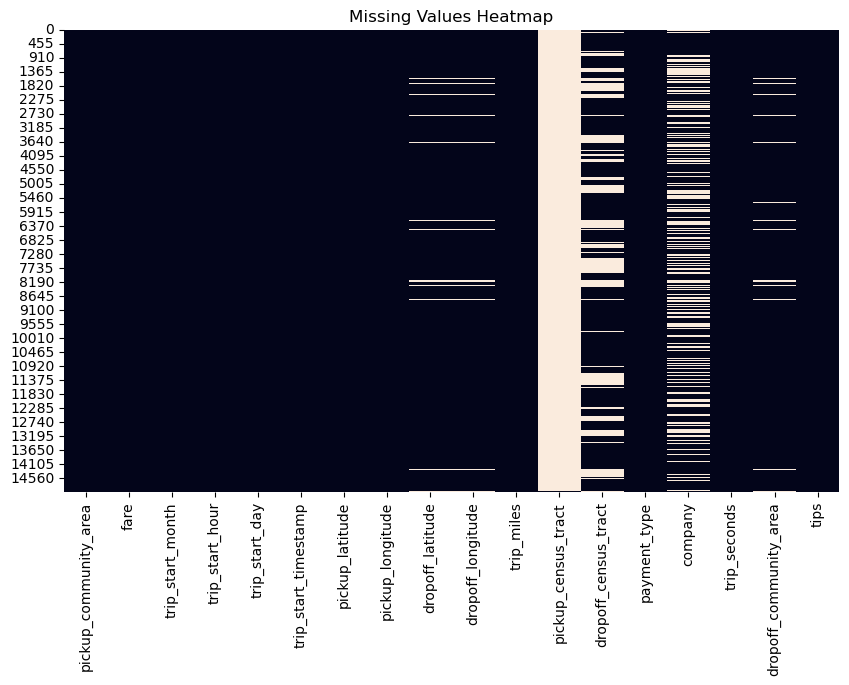

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### Bar Chart for visualization of missing values

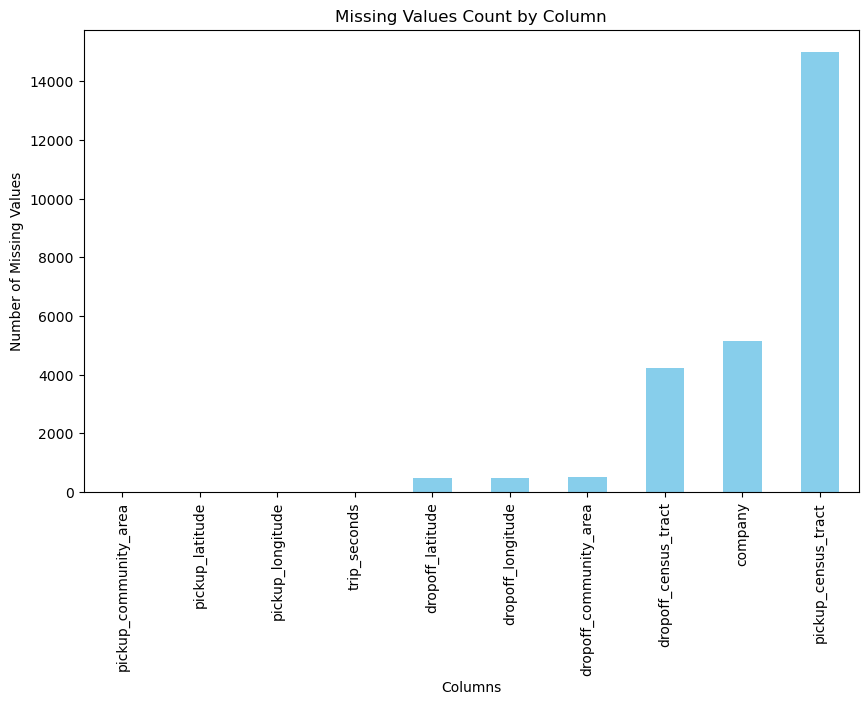

In [10]:
missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values
missing_values.sort_values(inplace=True)  # Sort values for better readability

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values Count by Column")
plt.show()

The plots show that columns: pickup_census_tract, company, dropoff_census_tract have significant missing values. The pickup_census_tract column is totally missing except for just one row. So it is better to just drop the column

## Handling Missing Values

Replace the NaN values in the first column with the Mode

In [11]:
df['pickup_community_area'].fillna(df['pickup_community_area'].mode()[0], inplace=True)
df['dropoff_community_area'].fillna(df['dropoff_community_area'].mode()[0], inplace=True)

Replace the latitude and longitude by the mean latitude and longitudes of the corresponding areas.

In [12]:
df['pickup_latitude'] = df.groupby('pickup_community_area')['pickup_latitude'].transform(lambda x: x.fillna(x.mean()))
df['pickup_longitude'] = df.groupby('pickup_community_area')['pickup_longitude'].transform(lambda x: x.fillna(x.mean()))

Replace the dropoff_latitude and dropoff_longitude by the mean latitude and longitudes of the corresponding areas.

In [13]:
df['dropoff_latitude'] = df.groupby('dropoff_community_area')['dropoff_latitude'].transform(lambda x: x.fillna(x.mean()))
df['dropoff_longitude'] = df.groupby('dropoff_community_area')['dropoff_longitude'].transform(lambda x: x.fillna(x.mean()))

Since there are a lot of missing values in census_tract data, we won't be able to reconstruct the entire series from the available data in a meaningful manner. Therefore, we drop these columns.

In [14]:
df.drop(['pickup_census_tract', 'dropoff_census_tract'], axis=1, inplace=True)

Replace the missing company name by any of  companies in with likelihood proportional to their occurence in the data

In [15]:
company_dict = df['company'].value_counts(normalize=True).to_dict()
company_dict

{'Taxi Affiliation Services': 0.5248428310687487,
 'Dispatch Taxi Affiliation': 0.16588927195295072,
 'Blue Ribbon Taxi Association Inc.': 0.11052524842831069,
 'Choice Taxi Association': 0.08842019874264855,
 'Northwest Management LLC': 0.055871020077063474,
 'KOAM Taxi Association': 0.02494423037923342,
 'Top Cab Affiliation': 0.01338470898397891,
 'Chicago Elite Cab Corp. (Chicago Carriag': 0.0026363820726019063,
 'Chicago Medallion Leasing INC': 0.0022307848306631515,
 'Chicago Medallion Management': 0.001723788278239708,
 'Chicago Elite Cab Corp.': 0.0009125937943621984,
 '4197 - 41842 Royal Star': 0.0005069965524234435,
 '0118 - 42111 Godfrey S.Awir': 0.00040559724193875484,
 '5074 - 54002 Ahzmi Inc': 0.00040559724193875484,
 '3253 - 91138 Gaither Cab Co.': 0.0003041979314540661,
 '3623 - 72222 Arrington Enterprises': 0.0003041979314540661,
 '1085 - 72312 N and W Cab Co': 0.0003041979314540661,
 '3201 - C&D Cab Co Inc': 0.0003041979314540661,
 '3011 - 66308 JBL Cab Inc.': 0.00030

In [16]:
df['company'] = df['company'].apply(lambda x: np.random.choice(list(company_dict.keys()), p=list(company_dict.values())) if pd.isnull(x) else x)

In [17]:
df['company'].value_counts()

company
Taxi Affiliation Services            7920
Dispatch Taxi Affiliation            2482
Blue Ribbon Taxi Association Inc.    1647
Choice Taxi Association              1314
Northwest Management LLC              830
                                     ... 
585 - 88805 Valley Cab Co               1
3897 - 57856 Ilie Malec                 1
2823 - 73307 Seung Lee                  1
2092 - 61288 Sbeih company              1
5997 - AW Services Inc.                 1
Name: count, Length: 61, dtype: int64

For missing trip_seconds values, we use mean imputation

In [18]:
df['trip_seconds'].fillna(df['trip_seconds'].mean(), inplace=True)

In [19]:
df.isna().sum()

pickup_community_area     0
fare                      0
trip_start_month          0
trip_start_hour           0
trip_start_day            0
trip_start_timestamp      0
pickup_latitude           0
pickup_longitude          0
dropoff_latitude          0
dropoff_longitude         0
trip_miles                0
payment_type              0
company                   0
trip_seconds              0
dropoff_community_area    0
tips                      0
dtype: int64

## Handling Datatypes

In [20]:
df['pickup_community_area'] = df['pickup_community_area'].astype('int64')
df['fare'] = df['fare'].astype('float64')
df['dropoff_community_area'] = df['dropoff_community_area'].astype('int64')
df['trip_start_month'] = df['trip_start_month'].astype('int64')
df['trip_start_hour'] = df['trip_start_hour'].astype('int64')
df['trip_start_day'] = df['trip_start_day'].astype('int64')
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])
df['pickup_latitude'] = df['pickup_latitude'].astype('float64')
df['pickup_longitude'] = df['pickup_longitude'].astype('float64')
df['dropoff_latitude'] = df['dropoff_latitude'].astype('float64')
df['dropoff_longitude'] = df['dropoff_longitude'].astype('float64')
df['trip_miles'] = df['trip_miles'].astype('float64')
df['payment_type'] = df['payment_type'].astype('object')
df['company'] = df['company'].astype('object')
df['trip_seconds'] = df['trip_seconds'].astype('int64')
df['tips'] = df['tips'].astype('float64')

In [21]:
df.dtypes

pickup_community_area              int64
fare                             float64
trip_start_month                   int64
trip_start_hour                    int64
trip_start_day                     int64
trip_start_timestamp      datetime64[ns]
pickup_latitude                  float64
pickup_longitude                 float64
dropoff_latitude                 float64
dropoff_longitude                float64
trip_miles                       float64
payment_type                      object
company                           object
trip_seconds                       int64
dropoff_community_area             int64
tips                             float64
dtype: object

## Outlier Analysis

### Outliers in Trip Distance

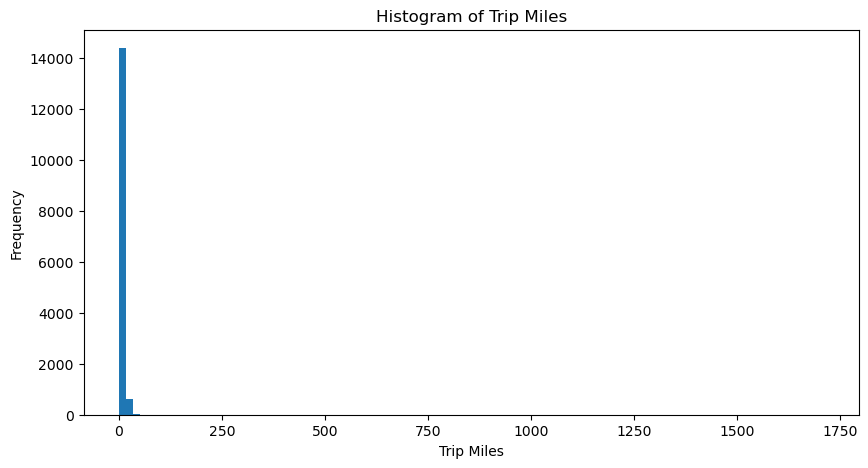

In [22]:
df['trip_miles'].plot(kind='hist', bins=100, figsize=(10, 5))
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Miles')
plt.show()

In [23]:
# Number of trips with trip miles greater than 200
df[df['trip_miles'] > 200].shape[0]

1

Clearly there is an outlier (possibly corrupted data). Let us examine the contents of that row.

In [24]:
df.iloc[df['trip_miles'].argmax()]

pickup_community_area                                76
fare                                              35.05
trip_start_month                                     10
trip_start_hour                                      15
trip_start_day                                        1
trip_start_timestamp      1970-01-01 00:00:01.443973500
pickup_latitude                               41.979071
pickup_longitude                              -87.90304
dropoff_latitude                              41.880994
dropoff_longitude                            -87.632746
trip_miles                                       1710.0
payment_type                                Credit Card
company                       Taxi Affiliation Services
trip_seconds                                       2100
dropoff_community_area                               32
tips                                               5.56
Name: 1518, dtype: object

Replace this distance by the Havesine Distance between the Starting and Ending Coordinates

In [25]:
from math import radians, sin, cos, sqrt, atan2

# Earth's radius in kilometers
R = 6371.0

# Coordinates of the points in decimal degrees
pickup_lat = 41.979071
pickup_lon = -87.90304
dropoff_lat = 41.880994
dropoff_lon = -87.632746

# Convert latitude and longitude from degrees to radians
pickup_lat_rad = radians(pickup_lat)
pickup_lon_rad = radians(pickup_lon)
dropoff_lat_rad = radians(dropoff_lat)
dropoff_lon_rad = radians(dropoff_lon)

# Differences in coordinates
delta_lat = dropoff_lat_rad - pickup_lat_rad
delta_lon = dropoff_lon_rad - pickup_lon_rad

# Haversine formula
a = sin(delta_lat / 2)**2 + cos(pickup_lat_rad) * cos(dropoff_lat_rad) * sin(delta_lon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))
distance = R * c * 0.621371 # Convert to miles

df.at[df['trip_miles'].argmax(), 'trip_miles'] = distance

print(f"Distance: {distance:.2f} miles")

Distance: 15.46 miles


In [26]:
df['trip_miles'] = df['trip_miles'].replace(0, df['trip_miles'].mean())

### Outliers in Trip Duration

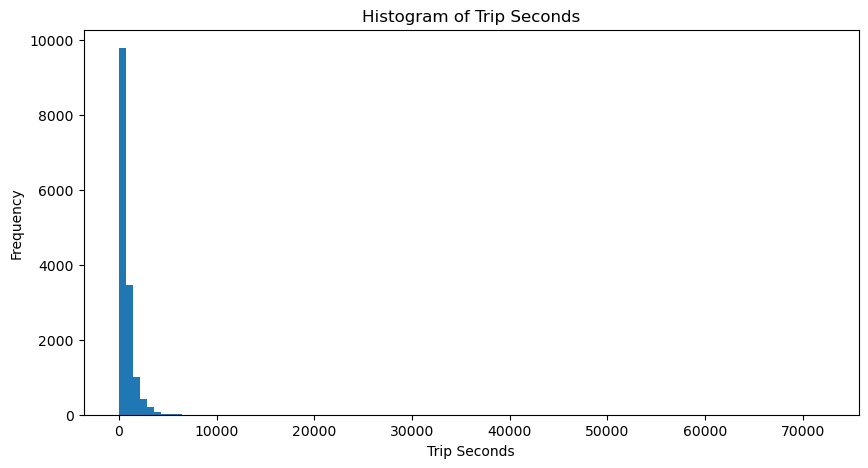

In [27]:
df['trip_seconds'].plot(kind='hist', bins=100, figsize=(10, 5))
plt.xlabel('Trip Seconds')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Seconds')
plt.show()

In [28]:
df['trip_seconds'].describe()

count    15002.000000
mean       777.627250
std        977.343254
min          0.000000
25%        360.000000
50%        540.000000
75%        960.000000
max      72120.000000
Name: trip_seconds, dtype: float64

In [29]:
import warnings
warnings.filterwarnings('ignore')
# Filter out trips with non-positive trip_seconds to avoid division by zero
filtered_df = df[df['trip_seconds'] > 0 & (df['trip_seconds'] < 6000)]

# Calculate average speed in miles per hour
filtered_df['avg_speed'] = filtered_df['trip_miles'] / (filtered_df['trip_seconds'] / 3600)

# Calculate the overall average speed
overall_avg_speed = filtered_df['avg_speed'].mean()
overall_avg_speed

17.90116279793171

In [30]:
# Calculate the average speed for each company with more than 100 trips
company_avg_speed = filtered_df.groupby('company').filter(lambda x: len(x) > 100).groupby('company')['avg_speed'].mean().sort_values(ascending=False)
company_avg_speed

company
Blue Ribbon Taxi Association Inc.    18.432774
Taxi Affiliation Services            18.087685
Top Cab Affiliation                  17.807954
Northwest Management LLC             17.715619
Choice Taxi Association              17.639500
Dispatch Taxi Affiliation            17.575560
KOAM Taxi Association                16.286819
Name: avg_speed, dtype: float64

So it is safe to impute the abnormal trip_duration values using trip_distance and avg_speed

In [31]:
df.loc[df['trip_seconds'] == 0, 'trip_seconds'] = df['trip_miles'] / overall_avg_speed * 3600

In [32]:
for i in range(1000,10000,1000):
    print(f"Number of trips with trip seconds greater than {i}: {df[df['trip_seconds'] > i].shape[0]}")
    # Find avg speed for trips with trip seconds greater than i
    avg_speed = df[df['trip_seconds'] > i]['trip_miles'].sum() / (df[df['trip_seconds'] > i]['trip_seconds'].sum() / 3600)
    print(f"Average speed for trips with trip seconds greater than {i}: {avg_speed:.2f} mph")

Number of trips with trip seconds greater than 1000: 3415
Average speed for trips with trip seconds greater than 1000: 16.60 mph
Number of trips with trip seconds greater than 2000: 898
Average speed for trips with trip seconds greater than 2000: 14.89 mph
Number of trips with trip seconds greater than 3000: 272
Average speed for trips with trip seconds greater than 3000: 11.43 mph
Number of trips with trip seconds greater than 4000: 87
Average speed for trips with trip seconds greater than 4000: 8.79 mph
Number of trips with trip seconds greater than 5000: 29
Average speed for trips with trip seconds greater than 5000: 6.73 mph
Number of trips with trip seconds greater than 6000: 13
Average speed for trips with trip seconds greater than 6000: 5.04 mph
Number of trips with trip seconds greater than 7000: 9
Average speed for trips with trip seconds greater than 7000: 3.84 mph
Number of trips with trip seconds greater than 8000: 5
Average speed for trips with trip seconds greater than 80

Here, the avg. speed starts showing unexpected behavior for > 2000 seconds. So we drop all the entriies with greater than 2000 sec duration

<AxesSubplot: ylabel='Frequency'>

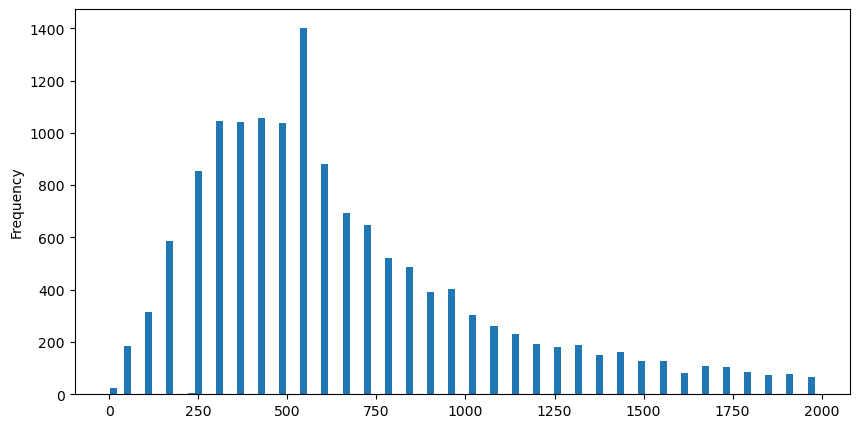

In [33]:
df.drop(df[df['trip_seconds'] > 2000].index, inplace=True)
df['trip_seconds'].plot(kind='hist', bins=100, figsize=(10, 5))

In [34]:
# Save the data to a new csv file
df.to_csv('TaxiDataCleaned.csv', index=False)